In [1]:
import pandas as pd

df = pd.read_csv("marine_fish_catch_sri_lanka_clean.csv")

In [2]:
df_clean = df.dropna()

print("Before:", df.shape)
print("After:", df_clean.shape)

Before: (180, 4)
After: (176, 4)


In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_clean["District_encoded"] = le.fit_transform(df_clean["District"])

df_clean.head()

C:\Users\faish\AppData\Local\Temp\ipykernel_9480\3944770407.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["District_encoded"] = le.fit_transform(df_clean["District"])


,District,Year,Catch_MT,Catch_kg,District_encoded
0,Negombo,1983,19030.0,19030000.0,11
1,Colombo,1983,2320.0,2320000.0,2
2,Kalutara,1983,7630.0,7630000.0,6
3,Galle,1983,8590.0,8590000.0,3
4,Matara,1983,8980.0,8980000.0,9


In [5]:
X = df_clean[["Year", "District_encoded"]]
y = df_clean["Catch_kg"]

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (140, 2)
Test set size: (36, 2)


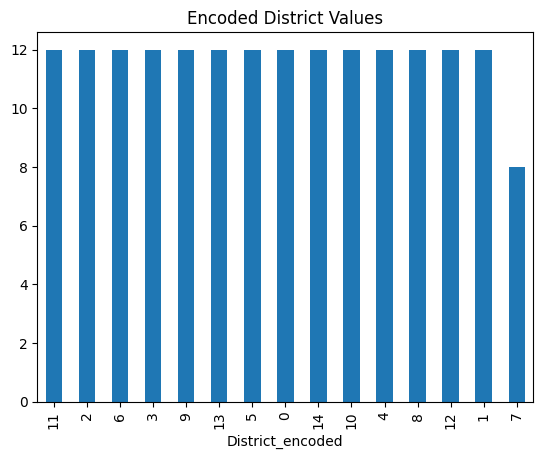

In [8]:
import matplotlib.pyplot as plt

df_clean["District_encoded"].value_counts().plot(kind="bar")
plt.title("Encoded District Values")
plt.show()


In [9]:
#MODEL DEVELOPMENT

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


In [10]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [11]:
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [13]:
# Predictions using Linear Regression
y_pred_lr = lr_model.predict(X_test)

# Predictions using Random Forest
y_pred_rf = rf_model.predict(X_test)


In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Linear Regression evaluation
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

# Random Forest evaluation
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Linear Regression:")
print("MAE:", mae_lr)
print("RMSE:", rmse_lr)
print("R2:", r2_lr)

print("\nRandom Forest:")
print("MAE:", mae_rf)
print("RMSE:", rmse_rf)
print("R2:", r2_rf)


Linear Regression:
MAE: 10182902.02987916
RMSE: 12497868.637496669
R2: 0.0544814125443287

Random Forest:
MAE: 6363162.5
RMSE: 7908527.547733768
R2: 0.6213923166517934


In [15]:
#MODEL EVALUATION

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [16]:
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Performance")
print("MAE:", mae_lr)
print("RMSE:", rmse_lr)
print("R2 Score:", r2_lr)


Linear Regression Performance
MAE: 10182902.02987916
RMSE: 12497868.637496669
R2 Score: 0.0544814125443287


In [17]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression Performance")
print("MAE:", mae_rf)
print("RMSE:", rmse_rf)
print("R2 Score:", r2_rf)


Random Forest Regression Performance
MAE: 6363162.5
RMSE: 7908527.547733768
R2 Score: 0.6213923166517934


In [18]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "MAE": [mae_lr, mae_rf],
    "RMSE": [rmse_lr, rmse_rf],
    "R2_Score": [r2_lr, r2_rf]
})

results


,Model,MAE,RMSE,R2_Score
0,Linear Regression,1.018290e+07,1.249787e+07,0.054481
1,Random Forest,6.363162e+06,7.908528e+06,0.621392


In [19]:
import pandas as pd

# Create comparison DataFrame
comparison_df = X_test.copy()
comparison_df["Actual_Catch_kg"] = y_test.values
comparison_df["Pred_LR"] = y_pred_lr
comparison_df["Pred_RF"] = y_pred_rf

# Sort by Year for proper line plotting
comparison_df = comparison_df.sort_values(by="Year")


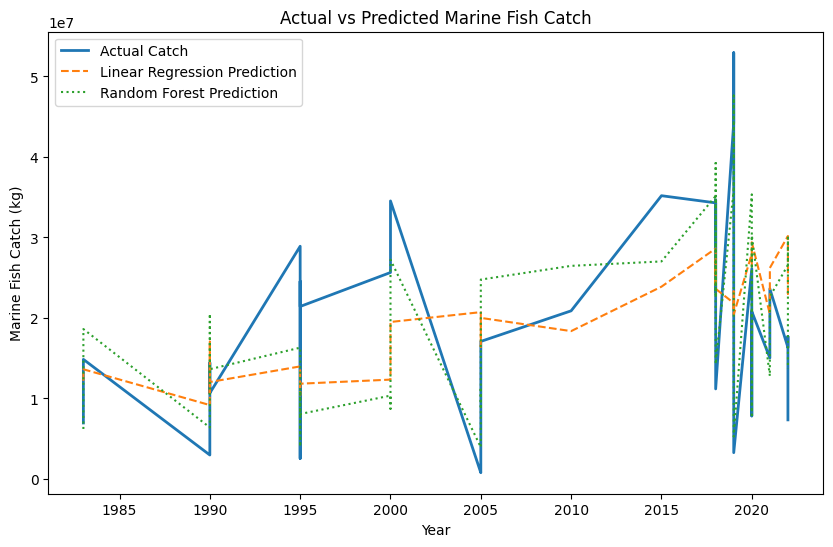

In [20]:
import matplotlib.pyplot as plt
import os

os.makedirs("images", exist_ok=True)

plt.figure(figsize=(10,6))

plt.plot(
    comparison_df["Year"],
    comparison_df["Actual_Catch_kg"],
    label="Actual Catch",
    linewidth=2
)

plt.plot(
    comparison_df["Year"],
    comparison_df["Pred_LR"],
    label="Linear Regression Prediction",
    linestyle="--"
)

plt.plot(
    comparison_df["Year"],
    comparison_df["Pred_RF"],
    label="Random Forest Prediction",
    linestyle=":"
)

plt.xlabel("Year")
plt.ylabel("Marine Fish Catch (kg)")
plt.title("Actual vs Predicted Marine Fish Catch")
plt.legend()

plt.savefig("actual_vs_predicted_comparison.png", dpi=300, bbox_inches="tight")
plt.show()


In [21]:
# MODEL DEPLOYEMENT

import pickle

# Save Random Forest model
with open("rf_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)

# Save label encoder
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)


In [22]:
pip install streamlit


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
